In [1]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [3]:
df.stack().unstack(0).unstack(0).stack(0).swaplevel().sort_index(level = 0)

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [4]:
confirm = pd.read_csv('./datasets/dataset_session_21/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('./datasets/dataset_session_21/time_series_covid19_deaths_global.csv')

In [5]:
confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [6]:
deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/24/22', '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22',
       '12/30/22', '12/31/22', '1/1/23', '1/2/23'],
      dtype='object', length=1081)

In [7]:
confirm = confirm.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],var_name = 'date',value_name = 'num_cases')
deaths = deaths.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],var_name = 'date',value_name = 'num_deaths')

In [8]:
confirm.head(2)

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [11]:
new = confirm.merge(deaths, on = ['Province/State', 'Country/Region','Lat','Long','date'])[['Province/State', 'Country/Region','date','num_cases','num_deaths']]

In [44]:
final_df = new.set_index(['Country/Region','Province/State'])
final_df.head(2)

,,date,num_cases,num_deaths
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [47]:
# code here
temp = final_df.groupby('Country/Region').sum()

In [53]:
temp['percentage'] = (temp['num_deaths']/temp['num_cases'])*100
temp['percentage'].sort_values(ascending = False).head(1)

Country/Region
Korea, North    600.0
Name: percentage, dtype: float64

### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [65]:
# code here
india_df = final_df.loc['India'].copy()
india_df

,date,num_cases,num_deaths
Province/State,,,
NaN,1/22/20,0,0
NaN,1/23/20,0,0
NaN,1/24/20,0,0
NaN,1/25/20,0,0
NaN,1/26/20,0,0
...,...,...,...
NaN,12/29/22,44679382,530699
NaN,12/30/22,44679608,530702
NaN,12/31/22,44679873,530705


In [69]:
india_df['new_cases'] = india_df['num_cases'] - india_df['num_cases'].shift(1)
india_df

,date,num_cases,num_deaths,new_cases
Province/State,,,,
NaN,1/22/20,0,0,NaN
NaN,1/23/20,0,0,0.0
NaN,1/24/20,0,0,0.0
NaN,1/25/20,0,0,0.0
NaN,1/26/20,0,0,0.0
...,...,...,...,...
NaN,12/29/22,44679382,530699,243.0
NaN,12/30/22,44679608,530702,226.0
NaN,12/31/22,44679873,530705,265.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [71]:
# code here
data = pd.read_csv('./datasets/dataset_task_21/List of most-polluted cities by particulate matter concentration.csv')
data.head(2)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018


In [77]:
data.drop(columns = 'Unnamed: 0',inplace = True)

In [80]:
data.set_index(['Country','City/Town'],inplace = True)

In [93]:
## 1.
data.loc['India'].groupby('City/Town').sum().sort_values(by = 'PM10',ascending = False).head(1).index[0]

'Kanpur'

In [94]:
## 2.
data.loc['India'].groupby('City/Town').sum().sort_values(by = 'PM10',ascending = True).head(1)

,Position,Year,PM2.5,PM10,Database version (year)
City/Town,,,,,
Aizawl,484,2016,27,44,2018


In [95]:
## 3.
data.loc['China'].groupby('City/Town').sum().sort_values(by = 'PM10',ascending = True).head(1)
# data.loc['China'].groupby('City/Town').sum().sort_values(by = 'PM10',ascending = True).head(1)

,Position,Year,PM2.5,PM10,Database version (year)
City/Town,,,,,
Anshun,477,2016,27,38,2018


In [96]:
data.loc['China'].groupby('City/Town').sum().sort_values(by = 'PM10',ascending = True).tail(1)

,Position,Year,PM2.5,PM10,Database version (year)
City/Town,,,,,
Jinan,80,4030,163,333,4036


<AxesSubplot:ylabel='PM10'>

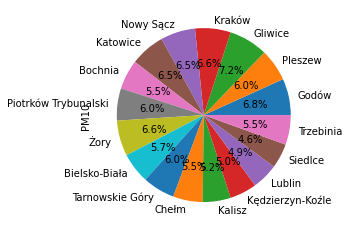

In [100]:
## 4
data.loc['Poland']['PM10'].plot(kind = 'pie',autopct = '%0.1f%%')

<AxesSubplot:xlabel='Country,City/Town'>

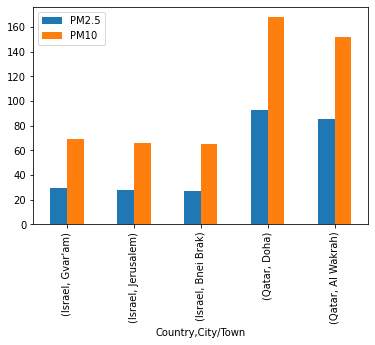

In [103]:
## 5
data.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind = 'bar')

In [111]:
## 6.
data.stack()

Country  City/Town                         
India    Kanpur     Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                    PM10                        319
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 2638, dtype: object